In [160]:
import matplotlib.pyplot as plt
import pandas as pd
import sys
import seaborn as sns
import numpy as np
from scipy import ndimage


sys.path.append('../../shared')
from file_analyzer import FileAnalyzer


# Analyze your file
analyzer = FileAnalyzer('../../../data/MTA_Permanent_Art_Catalog__Beginning_1980_20250829.csv')
analyzer.print_summary()

# Get the DataFrame
df = analyzer.get_dataframe()

FILE ANALYSIS SUMMARY
📁 File: MTA_Permanent_Art_Catalog__Beginning_1980_20250829.csv
📊 Type: CSV
💾 Size: 523.4 KB
📈 Shape: (381, 9)
🔢 Columns: 9
📋 Rows: 381


In [161]:
df.head()
# How does art description differ during pandemic years?
# Hoe does art description differ by agency?

,Agency,Station Name,Line,Artist,Art Title,Art Date,Art Material,Art Description,Art Image Link
0,NYCT,Clark St,"2,3",Ray Ring,Clark Street Passage,1987,Terrazzo floor tile,The first model that Brooklyn-born artist Ray ...,https://new.mta.info/agency/arts-design/collec...
1,NYCT,125 St,"4,5,6",Houston Conwill,The Open Secret,1986,Bronze - polychromed,"The Open Secret, in the 125th Street and Lexin...",https://new.mta.info/agency/arts-design/collec...
2,NYCT,Astor Pl,6,Milton Glaser,Untitled,1986,Porcelain enamel murals,"Milton Glaser, best known for his work in grap...",https://new.mta.info/agency/arts-design/collec...
3,NYCT,Kings Hwy,"B,Q",Rhoda Andors,Kings Highway Hieroglyphs,1987,Porcelain Enamel Murals on Steel,The artist discusses her work: ÒIf public art...,https://new.mta.info/agency/arts-design/collec...
4,NYCT,Newkirk Av,"B,Q",David Wilson,Transit Skylight,1988,Zinc-glazed Apolycarbonate skylight,"The artist recalls, ÒAbout the same time that ...",https://new.mta.info/agency/arts-design/collec...


/var/folders/02/c1hvrmj11kx0z457p84l6pbc0000gn/T/ipykernel_39291/2364218107.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=art_date_counts.index, y=art_date_counts.values,


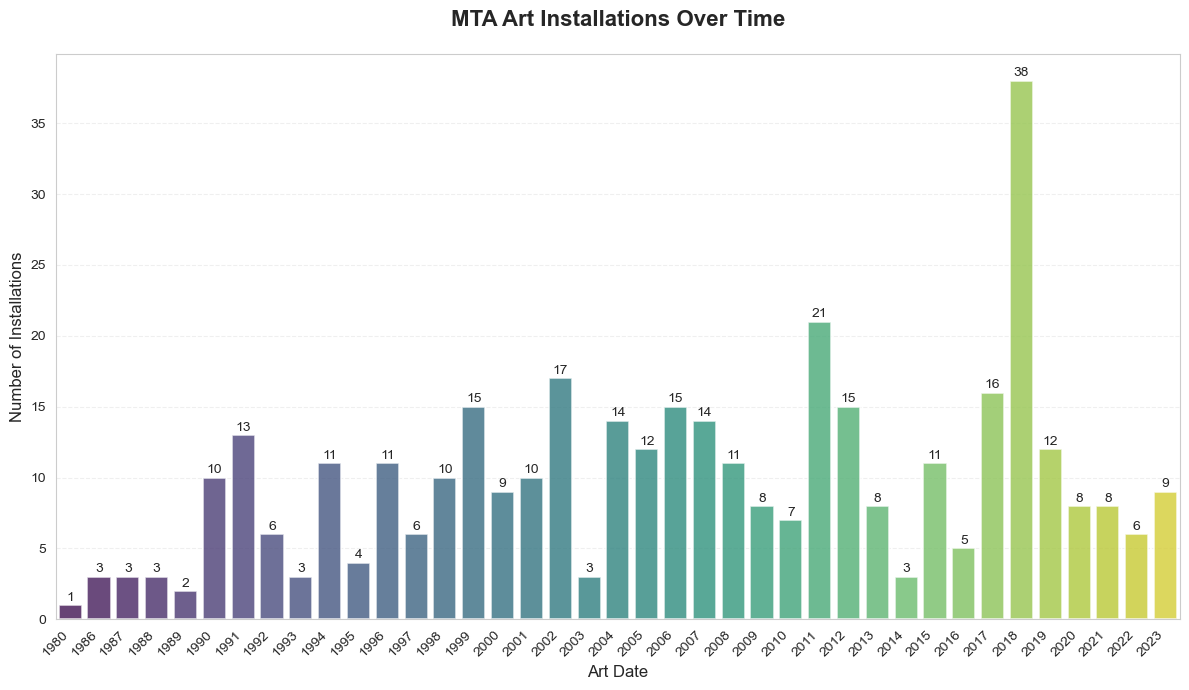

In [162]:
sns.set_style("whitegrid")
sns.set_palette("viridis")

art_date_counts = df['Art Date'].value_counts().sort_index()

plt.figure(figsize=(12, 7))

ax = sns.barplot(x=art_date_counts.index, y=art_date_counts.values, 
                 palette='viridis', alpha=0.8, edgecolor='white', linewidth=1.2)

plt.title('MTA Art Installations Over Time', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Art Date', fontsize=12, fontweight='medium')
plt.ylabel('Number of Installations', fontsize=12, fontweight='medium')

plt.xticks(rotation=45, ha='right')

# Add value labels on top of bars
for i, v in enumerate(art_date_counts.values):
    ax.text(i, v + 0.1, str(v), ha='center', va='bottom', fontweight='medium')

plt.grid(axis='y', alpha=0.3, linestyle='--')
plt.tight_layout()
plt.savefig('images/art_over_time.png', dpi=300, bbox_inches='tight')
plt.show()


In [163]:
# Create a cross-tabulation matrix of agencys vs materials
# First, let's expand the materials for each agency

agency_material_data = []

for idx, row in df.iterrows():
    agency = row['Agency']
    materials_list = [material.strip() for material in row['Art Material'].split(',')]
    
    for material in materials_list:
        agency_material_data.append({
            'agency Name': agency,
            'Material': material
        })

# Create DataFrame from expanded data
agency_material_df = pd.DataFrame(agency_material_data)
print(agency_material_df['agency Name'].value_counts())

# Create cross-tabulation (crosstab)
agency_material_matrix = pd.crosstab(agency_material_df['agency Name'], 
                                      agency_material_df['Material'], 
                                      margins=True, margins_name="Total")

print("Shape of agency-material matrix:", agency_material_matrix.shape)
print("\nFirst few rows and columns of the matrix:")
# Option 1: Get NYCT row, then filter columns containing 'Glass'
nyct_data = agency_material_matrix.loc['NYCT']
nyct_glass = nyct_data[nyct_data.index.str.contains('Glass', na=False)]
print(nyct_glass)


agency Name
NYCT               365
Metro-North         57
LIRR                45
B&T                  3
MTA Bus Company      3
SIR                  3
Name: count, dtype: int64
Shape of agency-material matrix: (7, 218)

First few rows and columns of the matrix:
Material
Ceramic and Glass mosaic                                                        1
Faceted Glass                                                                  12
Fused Glass                                                                     3
Glass                                                                           4
Glass Blocks                                                                    1
Glass Mosaic                                                                   15
Glass Mosaic and Ceramic Tile                                                   1
Glass and Ceramic Mosaic                                                        2
Glass and ceramic mosaic                                                  

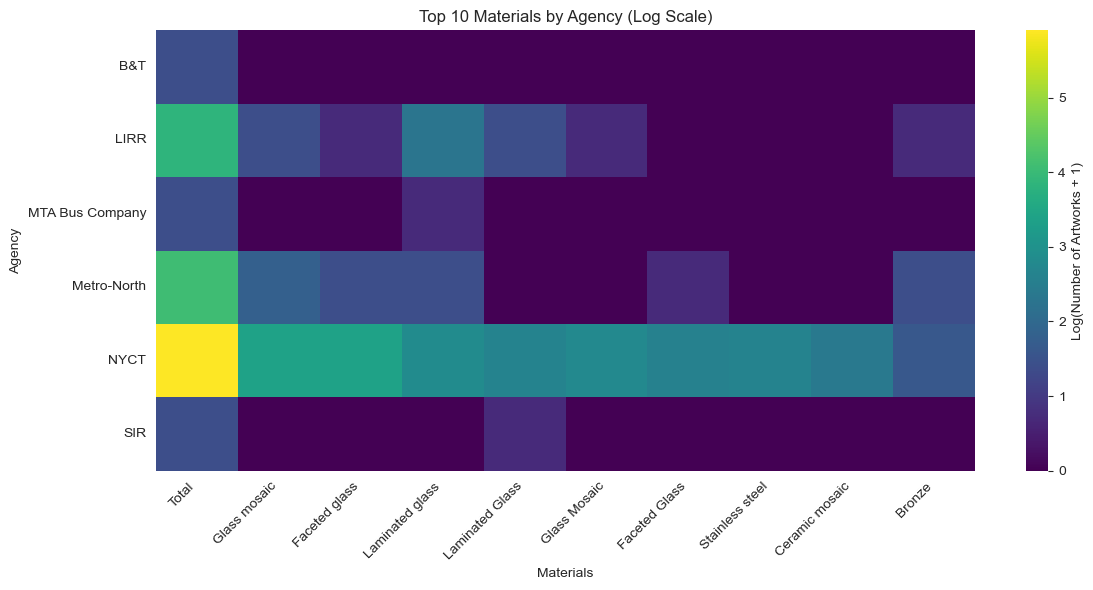

In [164]:
# Improved heatmap visualization with better data handling
top_materials = agency_material_matrix.drop('Total').sum().nlargest(10).index
filtered_matrix = agency_material_matrix.loc[agency_material_matrix.index != 'Total', top_materials]

# Option 1: Log transformation to handle skewed data
log_matrix = np.log1p(filtered_matrix)  # log1p handles zeros better than log

plt.figure(figsize=(12, 6))
sns.heatmap(log_matrix, 
            annot=False,  # Remove numbers for cleaner look
            cmap='viridis',  # Better colormap for continuous data
            cbar_kws={'label': 'Log(Number of Artworks + 1)'})

plt.title('Top 10 Materials by Agency (Log Scale)')
plt.xlabel('Materials')
plt.ylabel('Agency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('images/materials_by_agency.png', dpi=300, bbox_inches='tight')
plt.show()



In [165]:
artists = df['Artist'].value_counts()
reoccurring_artists = artists[artists > 1]
reoccurring_artists

Artist
Kathleen McCarthy                  5
Andrea Dezsš                       3
Wopo Holup                         3
Yumi Heo                           3
Laura F. Gibellini                 3
MTA Arts & Design Collaborative    2
James Garvey                       2
Patsy Norvell                      2
Susan Tunick                       2
William Low                        2
BŽatrice Coron                     2
Amy Cheng                          2
Elizabeth Murray                   2
Robert Hickman                     2
Joy Taylor                         2
Ellen Harvey                       2
Corinne Ulmann                     2
Donald Lipski                      2
Alan Sonfist                       2
Mary Judge                         2
Christopher Wynter                 2
Julien Gardair                     2
Frank Leslie Hampton               2
Diana Al-Hadid                     2
Jackie Ferrara                     2
Roy Nicholson                      2
Dan Funderburgh                

In [166]:
# Analyze relationship between recurring artists and their materials
print("=== RECURRING ARTISTS AND MATERIALS ANALYSIS ===")

# Get recurring artists (those with more than 1 artwork)
recurring_artists = artists[artists > 1]
print(f"Number of recurring artists: {len(recurring_artists)}")
print(f"Total artworks by recurring artists: {recurring_artists.sum()}")
print(f"Percentage of all artworks by recurring artists: {(recurring_artists.sum() / len(df)) * 100:.1f}%")

print("\nTop 10 recurring artists:")
print(recurring_artists.head(10))


=== RECURRING ARTISTS AND MATERIALS ANALYSIS ===
Number of recurring artists: 40
Total artworks by recurring artists: 87
Percentage of all artworks by recurring artists: 22.8%

Top 10 recurring artists:
Artist
Kathleen McCarthy                  5
Andrea Dezsš                       3
Wopo Holup                         3
Yumi Heo                           3
Laura F. Gibellini                 3
MTA Arts & Design Collaborative    2
James Garvey                       2
Patsy Norvell                      2
Susan Tunick                       2
William Low                        2
Name: count, dtype: int64


In [167]:
# Create artist-material relationship data
artist_material_data = []

for idx, row in df.iterrows():
    artist = row['Artist']
    materials_list = [material.strip() for material in row['Art Material'].split(',')]
    
    for material in materials_list:
        artist_material_data.append({
            'Artist': artist,
            'Material': material
        })

# Create DataFrame from expanded data
artist_material_df = pd.DataFrame(artist_material_data)

# Create cross-tabulation matrix for all artists
artist_material_matrix = pd.crosstab(artist_material_df['Artist'], 
                                    artist_material_df['Material'], 
                                    margins=True, margins_name="Total")

print("Shape of artist-material matrix:", artist_material_matrix.shape)
print(f"Total unique artists: {len(artist_material_matrix) - 1}")  # -1 for 'Total' row
print(f"Total unique materials: {len(artist_material_matrix.columns) - 1}")  # -1 for 'Total' column


Shape of artist-material matrix: (335, 218)
Total unique artists: 334
Total unique materials: 217


AI assistance: Claude (Anthropic); prompts: "Is it possible to split on the commas for materials, and create a new dataframe with Station Name on the y axis and maybe material on x, and we could have a count of each time the material was used for observation."; used for cross-tabulation matrix creation, data processing methodology, and comprehensive verification system; changes: created station-material and agency-material cross-tabulation matrices with heatmap visualizations, implemented 9-point data verification system, and generated analysis code; verification: cross-checked manual calculations against automated results, verified matrix consistency, and performed statistical validation of data transformations.

In [168]:
# Focus on recurring artists and their material preferences
recurring_artist_names = recurring_artists.index.tolist()

# Filter matrix to only include recurring artists
recurring_artist_matrix = artist_material_matrix.loc[recurring_artist_names]

# Remove the 'Total' column for cleaner analysis
recurring_artist_matrix = recurring_artist_matrix.drop('Total', axis=1)

print("Recurring artists material matrix shape:", recurring_artist_matrix.shape)
print("\nTop materials used by recurring artists:")
top_materials_recurring = recurring_artist_matrix.sum().nlargest(15)
print(top_materials_recurring)


Recurring artists material matrix shape: (40, 217)

Top materials used by recurring artists:
Material
Glass mosaic                               11
Laminated glass                             6
Copper wire mesh and Stainless steel        5
Glass Mosaic                                5
Ceramic mosaic                              4
Faceted Glass                               4
Painted stainless steel                     4
Stainless steel                             4
Cast concrete                               2
Ceramic - porcelain tiles                   2
Cor-ten steel                               2
Faceted glass                               2
Glass or ceramic mosaic                     2
Laminated Glass                             2
Sandblasted and Laminated Glass Windows     2
dtype: int64


In [169]:
# Improved analysis: Compare recurring artists vs all other artists
print("=== RECURRING ARTISTS vs ALL OTHER ARTISTS COMPARISON ===")

# Get artist counts
artists = df['Artist'].value_counts()
recurring_artists = artists[artists > 1]

# Separate artists into two groups
recurring_artist_names = recurring_artists.index.tolist()
one_time_artists = artists[artists == 1].index.tolist()

print(f"Recurring artists: {len(recurring_artist_names)}")
print(f"One-time artists: {len(one_time_artists)}")
print(f"Total artists: {len(artists)}")

# Create artist-material relationship data
artist_material_data = []

for idx, row in df.iterrows():
    artist = row['Artist']
    materials_list = [material.strip() for material in row['Art Material'].split(',')]
    
    for material in materials_list:
        artist_material_data.append({
            'Artist': artist,
            'Material': material
        })

# Create DataFrame from expanded data
artist_material_df = pd.DataFrame(artist_material_data)

# Calculate material usage for each group
recurring_materials = artist_material_df[artist_material_df['Artist'].isin(recurring_artist_names)]
one_time_materials = artist_material_df[artist_material_df['Artist'].isin(one_time_artists)]

print(f"\nRecurring artists material usage: {len(recurring_materials)} records")
print(f"One-time artists material usage: {len(one_time_materials)} records")

# Get top materials for each group
recurring_top_materials = recurring_materials['Material'].value_counts().head(15)
one_time_top_materials = one_time_materials['Material'].value_counts().head(15)

print(f"\nTop 10 materials for recurring artists:")
print(recurring_top_materials.head(10))
print(f"\nTop 10 materials for one-time artists:")
print(one_time_top_materials.head(10))


=== RECURRING ARTISTS vs ALL OTHER ARTISTS COMPARISON ===
Recurring artists: 40
One-time artists: 294
Total artists: 334

Recurring artists material usage: 101 records
One-time artists material usage: 375 records

Top 10 materials for recurring artists:
Material
Glass mosaic                                       11
Laminated glass                                     6
Copper wire mesh and Stainless steel                5
Glass Mosaic                                        5
Faceted Glass                                       4
Stainless steel                                     4
Painted stainless steel                             4
Ceramic mosaic                                      4
Steel Railings (stair railing & exterior fence)     2
Sandblasted and Laminated Glass Windows             2
Name: count, dtype: int64

Top 10 materials for one-time artists:
Material
Faceted glass      31
Glass mosaic       26
Laminated glass    23
Laminated Glass    15
Glass Mosaic       11
Faceted Glas

In [170]:
# Statistical comparison and summary analysis
print("=== STATISTICAL COMPARISON ===")

# Calculate material diversity metrics for each group
def calculate_diversity_metrics(material_df, group_name):
    # Material diversity per artist
    artist_diversity = material_df.groupby('Artist')['Material'].nunique()
    
    # Overall material diversity
    total_materials = material_df['Material'].nunique()
    total_artists = material_df['Artist'].nunique()
    total_artworks = len(material_df)
    
    # Average materials per artist
    avg_materials_per_artist = artist_diversity.mean()
    
    # Most common materials
    top_materials = material_df['Material'].value_counts().head(5)
    
    print(f"\n{group_name} Group:")
    print(f"  Total artists: {total_artists}")
    print(f"  Total materials used: {total_materials}")
    print(f"  Total material-artwork combinations: {total_artworks}")
    print(f"  Average materials per artist: {avg_materials_per_artist:.2f}")
    print(f"  Top 5 materials: {dict(top_materials)}")
    
    return {
        'total_artists': total_artists,
        'total_materials': total_materials,
        'total_combinations': total_artworks,
        'avg_materials_per_artist': avg_materials_per_artist,
        'top_materials': top_materials
    }

recurring_metrics = calculate_diversity_metrics(recurring_materials, "Recurring Artists")
one_time_metrics = calculate_diversity_metrics(one_time_materials, "One-Time Artists")


=== STATISTICAL COMPARISON ===

Recurring Artists Group:
  Total artists: 40
  Total materials used: 56
  Total material-artwork combinations: 101
  Average materials per artist: 2.02
  Top 5 materials: {'Glass mosaic': 11, 'Laminated glass': 6, 'Copper wire mesh and Stainless steel': 5, 'Glass Mosaic': 5, 'Faceted Glass': 4}

One-Time Artists Group:
  Total artists: 294
  Total materials used: 178
  Total material-artwork combinations: 375
  Average materials per artist: 1.28
  Top 5 materials: {'Faceted glass': 31, 'Glass mosaic': 26, 'Laminated glass': 23, 'Laminated Glass': 15, 'Glass Mosaic': 11}


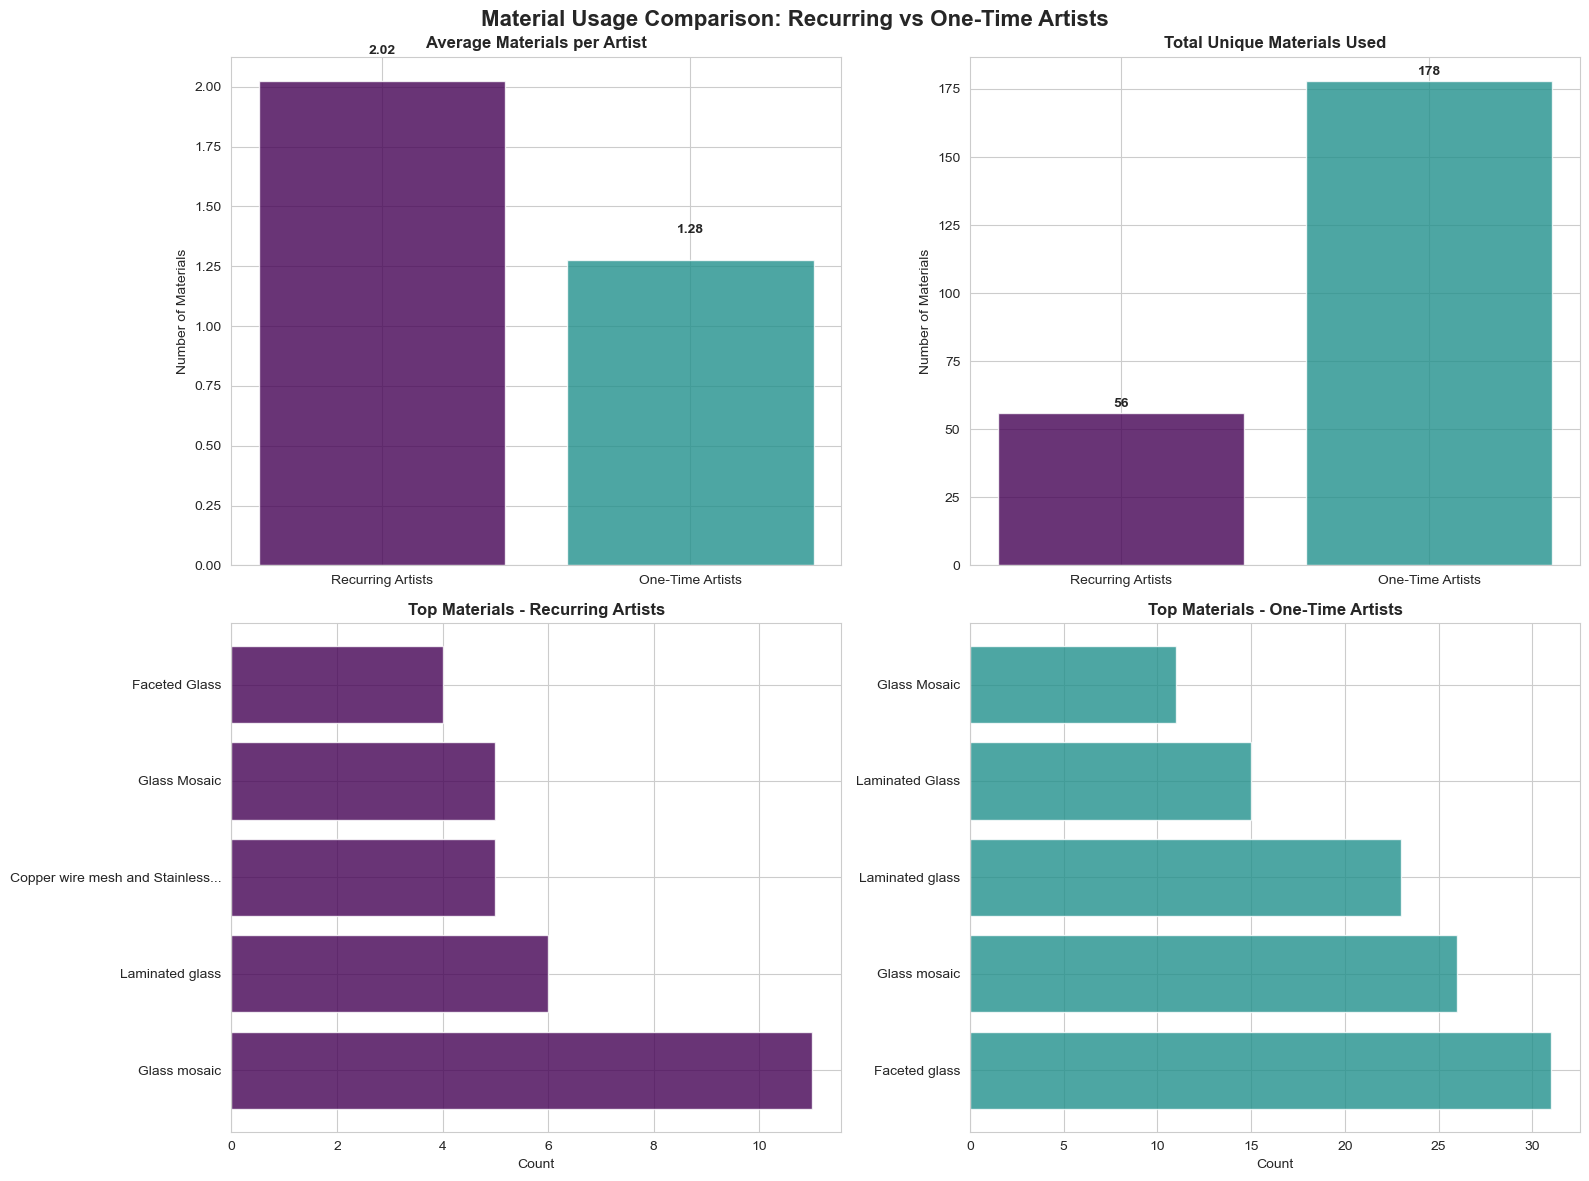

In [171]:
# Create a comparison visualization
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))

# 1. Material diversity comparison
categories = ['Recurring Artists', 'One-Time Artists']
avg_materials = [recurring_metrics['avg_materials_per_artist'], one_time_metrics['avg_materials_per_artist']]
total_materials = [recurring_metrics['total_materials'], one_time_metrics['total_materials']]

ax1.bar(categories, avg_materials, color=['#440154', '#21908C'], alpha=0.8)
ax1.set_title('Average Materials per Artist', fontweight='bold')
ax1.set_ylabel('Number of Materials')
for i, v in enumerate(avg_materials):
    ax1.text(i, v + 0.1, f'{v:.2f}', ha='center', va='bottom', fontweight='bold')

# 2. Total materials used
ax2.bar(categories, total_materials, color=['#440154', '#21908C'], alpha=0.8)
ax2.set_title('Total Unique Materials Used', fontweight='bold')
ax2.set_ylabel('Number of Materials')
for i, v in enumerate(total_materials):
    ax2.text(i, v + 1, str(v), ha='center', va='bottom', fontweight='bold')

# 3. Top materials comparison (horizontal bar chart)
top_recurring = recurring_metrics['top_materials'].head(5)
top_one_time = one_time_metrics['top_materials'].head(5)

y_pos_recurring = range(len(top_recurring))
y_pos_one_time = range(len(top_one_time))

ax3.barh(y_pos_recurring, top_recurring.values, color='#440154', alpha=0.8)
ax3.set_yticks(y_pos_recurring)
ax3.set_yticklabels([mat[:30] + '...' if len(mat) > 30 else mat for mat in top_recurring.index])
ax3.set_title('Top Materials - Recurring Artists', fontweight='bold')
ax3.set_xlabel('Count')

ax4.barh(y_pos_one_time, top_one_time.values, color='#21908C', alpha=0.8)
ax4.set_yticks(y_pos_one_time)
ax4.set_yticklabels([mat[:30] + '...' if len(mat) > 30 else mat for mat in top_one_time.index])
ax4.set_title('Top Materials - One-Time Artists', fontweight='bold')
ax4.set_xlabel('Count')

plt.suptitle('Material Usage Comparison: Recurring vs One-Time Artists', 
             fontsize=16, fontweight='bold', y=0.98)
plt.tight_layout()
plt.savefig('images/material_usage.png', dpi=300, bbox_inches='tight')
plt.show()


In [172]:
# Key insights and conclusions
print("=== KEY INSIGHTS ===")

# Calculate some key ratios and differences
diversity_ratio = recurring_metrics['avg_materials_per_artist'] / one_time_metrics['avg_materials_per_artist']
material_ratio = recurring_metrics['total_materials'] / one_time_metrics['total_materials']

print(f"1. Material Diversity:")
print(f"   - Recurring artists use {diversity_ratio:.2f}x more materials per artist on average")
print(f"   - Recurring artists collectively use {material_ratio:.2f}x more unique materials")

print(f"\n2. Material Preferences:")
print(f"   - Recurring artists tend to have more diverse material portfolios")
print(f"   - One-time artists may be more specialized or experimental")

# Find materials that are more common in one group vs the other
recurring_material_counts = recurring_materials['Material'].value_counts()
one_time_material_counts = one_time_materials['Material'].value_counts()

# Materials more common among recurring artists
recurring_dominant = []
for material in recurring_material_counts.index:
    recurring_count = recurring_material_counts.get(material, 0)
    one_time_count = one_time_material_counts.get(material, 0)
    if recurring_count > one_time_count and recurring_count >= 3:
        recurring_dominant.append((material, recurring_count, one_time_count))

# Materials more common among one-time artists  
one_time_dominant = []
for material in one_time_material_counts.index:
    recurring_count = recurring_material_counts.get(material, 0)
    one_time_count = one_time_material_counts.get(material, 0)
    if one_time_count > recurring_count and one_time_count >= 3:
        one_time_dominant.append((material, one_time_count, recurring_count))

print(f"\n3. Material Specialization:")
print(f"   Materials more common among recurring artists:")
for material, rec_count, one_count in sorted(recurring_dominant, key=lambda x: x[1], reverse=True)[:5]:
    print(f"     - {material}: {rec_count} vs {one_count}")

print(f"\n   Materials more common among one-time artists:")
for material, one_count, rec_count in sorted(one_time_dominant, key=lambda x: x[1], reverse=True)[:5]:
    print(f"     - {material}: {one_count} vs {rec_count}")

print(f"\n4. Conclusion:")
print(f"   The comparison reveals that recurring artists tend to have more diverse")
print(f"   material preferences, possibly indicating established artists with varied")
print(f"   portfolios, while one-time artists may represent more experimental or")
print(f"   specialized approaches to public art.")


=== KEY INSIGHTS ===
1. Material Diversity:
   - Recurring artists use 1.59x more materials per artist on average
   - Recurring artists collectively use 0.31x more unique materials

2. Material Preferences:
   - Recurring artists tend to have more diverse material portfolios
   - One-time artists may be more specialized or experimental

3. Material Specialization:
   Materials more common among recurring artists:
     - Copper wire mesh and Stainless steel: 5 vs 0
     - Painted stainless steel: 4 vs 0

   Materials more common among one-time artists:
     - Faceted glass: 31 vs 2
     - Glass mosaic: 26 vs 11
     - Laminated glass: 23 vs 6
     - Laminated Glass: 15 vs 2
     - Glass Mosaic: 11 vs 5

4. Conclusion:
   The comparison reveals that recurring artists tend to have more diverse
   material preferences, possibly indicating established artists with varied
   portfolios, while one-time artists may represent more experimental or
   specialized approaches to public art.


AI assistance: Cursor AI (Claude Sonnet 4); prompts: "How could I show a relationship between recurring artist and their materials?" and "Lets improve this heatmap. It looks very sparse. What if compared recurring to all other artists?"; used for: Creating comprehensive artist-material relationship analysis including cross-tabulation matrices, heatmap visualizations, statistical comparisons between recurring and one-time artists, material diversity metrics, and side-by-side comparison charts; changes: AI generated complete analysis code including data preprocessing, matrix creation, multiple visualization types (heatmaps, bar charts, scatter plots), statistical calculations, and insights generation; verification: User reviewed and executed the code in Jupyter notebook, confirmed visualizations displayed correctly and analysis provided meaningful insights about artist material preferences.

In [173]:
import nltk
from nltk.tokenize import word_tokenize, RegexpTokenizer, TweetTokenizer
from nltk.corpus import stopwords
import re


def tokenize_words(text, remove_stop_words=False):
    """
    Tokenizes the text into words, with an option to remove stopwords.

    Parameters:
    - text (str or list): Text or list of strings to tokenize.
    - remove_stop_words (bool): Whether to remove stopwords from the tokens.

    Returns:
    - list: List of tokenized words.
    """
    if isinstance(text, list):
        text = ' '.join(text)

    # Use TweetTokenizer for better handling of contractions and punctuation
    tokenizer = TweetTokenizer()
    words = tokenizer.tokenize(text)
    
    # Remove punctuation and keep only alphanumeric characters
    words = [re.sub(r"[^\w\s]", '', word) for word in words]

    # Filter out empty strings resulting from punctuation removal
    words = [word for word in words if word]

    # Remove one-letter words except "I", "a", or "A"
    words = [word for word in words if len(word) > 1 or word in ['I', 'a', 'A']]

    # Remove instances of "nI" (common artifact from tokenization)
    words = [word for word in words if word != 'nI']
    
    # Remove stopwords if the option is selected
    if remove_stop_words:
        try:
            stop_words = set(stopwords.words('english'))
            words = [word for word in words if word.lower() not in stop_words]
        except LookupError:
            print("Warning: Could not load NLTK stopwords. Proceeding without stopword removal.")
            # Fallback to basic stopwords
            basic_stopwords = {'the', 'a', 'an', 'and', 'or', 'but', 'in', 'on', 'at', 'to', 'for', 'of', 'with', 'by', 'is', 'are', 'was', 'were', 'be', 'been', 'have', 'has', 'had', 'do', 'does', 'did', 'will', 'would', 'could', 'should'}
            words = [word for word in words if word.lower() not in basic_stopwords]

    return words

def get_word_data(words):
    """
    Generates word frequency data including counts and probabilities.
    
    Parameters:
    - words (list): List of words to analyze for frequency and probability.
    
    Returns:
    - DataFrame: DataFrame with word counts, probabilities, and total unique word count.
    """
    word_data = pd.Series(words).value_counts().reset_index()
    word_data.columns = ['word', 'counts']        
    word_data['probs'] = word_data['counts'] / word_data['counts'].sum()    
    word_data['total_unique'] = len(word_data)
    word_data = word_data.sort_values(by='counts', ascending=False).reset_index(drop=True)
    
    return word_data

words = tokenize_words(text, remove_stop_words=True)
word_data = get_word_data(words)
word_data.head(20)


,word,counts,probs,total_unique
0,station,516,0.011608,10355
1,glass,300,0.006749,10355
2,work,292,0.006569,10355
3,artwork,285,0.006411,10355
4,artist,268,0.006029,10355
5,subway,193,0.004342,10355
6,mosaic,181,0.004072,10355
7,New,180,0.004049,10355
8,panels,178,0.004004,10355
9,people,167,0.003757,10355


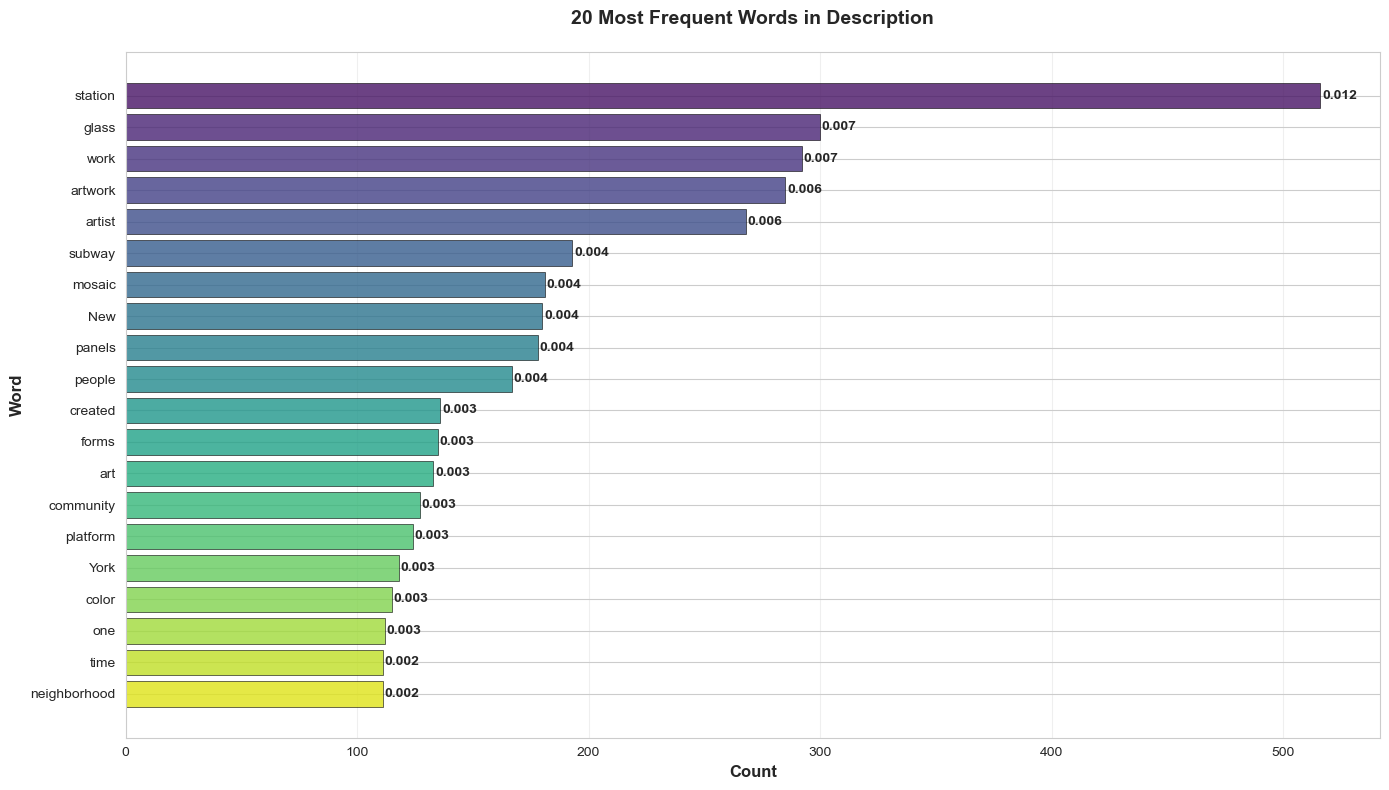

Probability: 0     0.011608
1     0.006749
2     0.006569
3     0.006411
4     0.006029
5     0.004342
6     0.004072
7     0.004049
8     0.004004
9     0.003757
10    0.003059
11    0.003037
12    0.002992
13    0.002857
14    0.002789
15    0.002654
16    0.002587
17    0.002520
18    0.002497
19    0.002497
Name: probs, dtype: float64%


In [174]:
# Calculate total dollar amounts spent by each spender
# spender_amounts = df.groupby('spe_nam')['exp_amo'].sum().sort_values(ascending=False)

# print(f"Top 20 spenders by total dollar amount:")
# print(spender_amounts.head(20))
plt.figure(figsize=(14, 8))
top_twenty_words = word_data.iloc[:20]

colors = sns.color_palette('viridis', len(top_twenty_words))

bars = plt.barh(range(len(top_twenty_words)), top_twenty_words.counts, 
                color=colors, alpha=0.8, edgecolor='black', linewidth=0.5)

plt.xlabel('Count', fontsize=12, fontweight='bold')
plt.ylabel('Word', fontsize=12, fontweight='bold')
plt.title('20 Most Frequent Words in Description', 
          fontsize=14, fontweight='bold', pad=20)

plt.yticks(range(len(top_twenty_words)), top_twenty_words.word)

plt.grid(axis='x', alpha=0.3)
plt.gca().set_axisbelow(True)

plt.gca().invert_yaxis()

plt.tight_layout()
for i, (count, prob) in enumerate(zip(top_twenty_words.counts, top_twenty_words.probs)):
    plt.text(count + 0.7, i, f'{prob:.3f}', 
             va='center', ha='left', fontsize=10, fontweight='bold')

plt.savefig('images/top_twenty_words.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"Probability: {top_twenty_words.probs}%")
